# Final Project

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# 1. Import and Explore Data

In [2]:
df = pd.read_csv('breast-cancer-datasets.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Attribute Information:**

Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
df = df.drop(['Unnamed: 32'], axis=1)

# 2. Data Viz

In [260]:
# diagnosis bar plot
p1 = go.Figure(data = [go.Bar(
            x = ['Benign', 'Malignant'], y = [df.id[df.diagnosis=='B'].count(), df.id[df.diagnosis=='M'].count()],
            text = [df.id[df.diagnosis=='B'].count(), df.id[df.diagnosis=='M'].count()], textposition='auto')])

p1.update_traces(marker_color = ['blue', 'red'], opacity=0.6)
p1.update_layout(title_text = 'Diagnosis')

p1.show()

In [258]:
# diagnosis percentage
p2 = go.Figure(data = [go.Pie(labels = ['Benign', 'Malignant'], 
                              values = [df.id[df.diagnosis=='B'].count(), df.id[df.diagnosis=='M'].count()], 
                              hole = .7)])
p2.update_layout(title_text = 'Diagnosis Percentage')

p2.show()

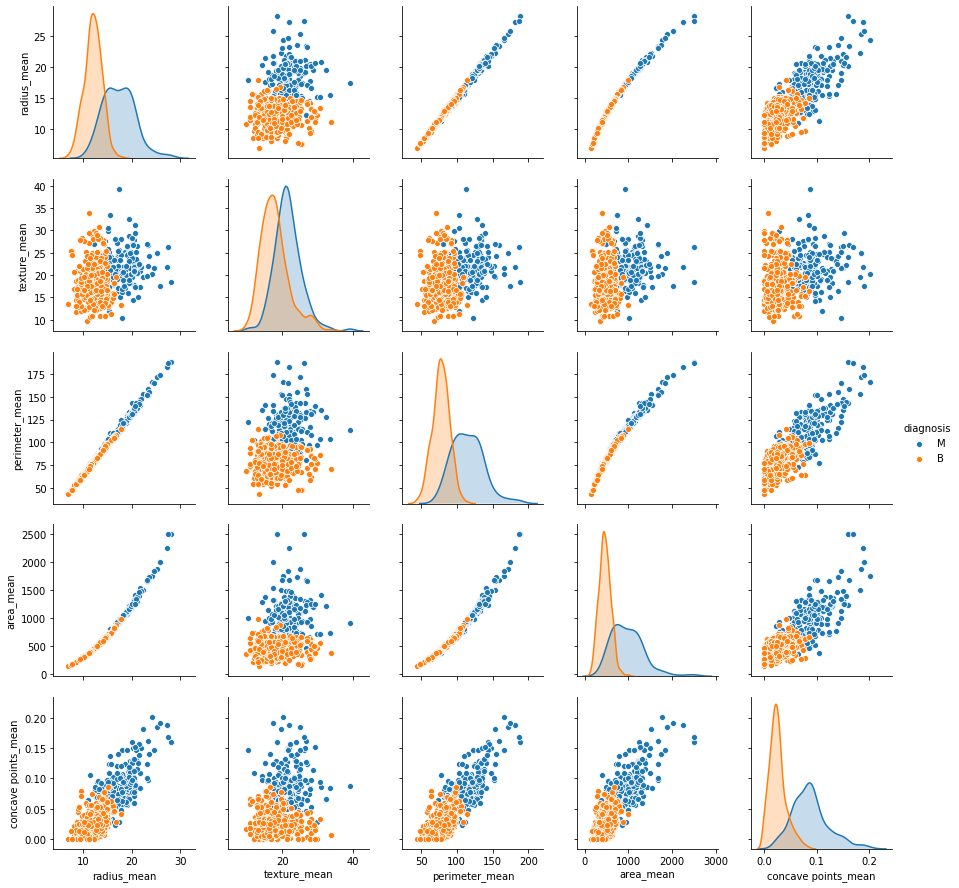

In [7]:
# pairplot of mean features
mean_ft = ['diagnosis','radius_mean', 'texture_mean', 
           'perimeter_mean', 'area_mean', 'concave points_mean']

p3 = sns.pairplot(df[mean_ft], hue = 'diagnosis')
plt.show()

# 3. Data Prep & Modelling

### Encoding Diagnosis

In [9]:
# dataframe copy
df2 = df.copy()
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
# encoding diagnosis
df2['diagnosis'] = le.fit_transform(df['diagnosis'])
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 3.1 Preprocessing & Modelling 1

### Preprocessing (Full Features)

In [13]:
import sklearn

In [14]:
df_X = df2.drop(['diagnosis'], axis=1)
df_y = df2[['diagnosis']]

In [15]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=33)

In [16]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

### Modelling (Logistic Regression)

In [17]:
# modelling
from sklearn.linear_model import LogisticRegression

cancer_model = LogisticRegression()
cancer_model.fit(X_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
cancer_model.score(X = X_train, y = y_train)

0.9673366834170855

In [19]:
pred = cancer_model.predict(X_test)

In [20]:
# model test with F1 score
from sklearn.metrics import f1_score

det = f1_score(y_test, pred)
det

0.9142857142857143

# 3.2 Preprocessing & Modelling 2

### Preprocessing (Filtering Features by Correlation)

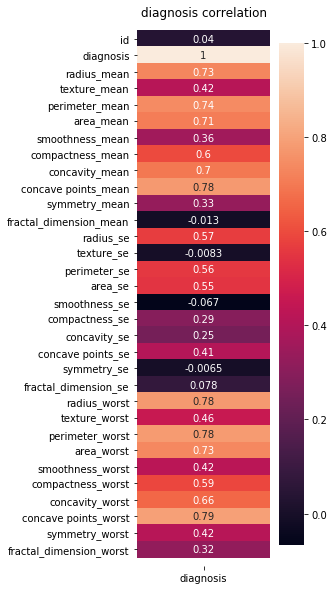

In [295]:
# features correltaion against diagnosis
plt.figure(figsize=(3,10))

p4 = sns.heatmap(data = df2.corr()[['diagnosis']], annot = True) 
bot, top = p5.get_ylim()
p4.set_ylim(bot+0.5, top-0.5)
p4.set_title('diagnosis correlation')
plt.show()

In [262]:
# filtering features with high correlation

diag_corr = df2.corr().loc['diagnosis']

# filtering threshold is 0.45, both + and -
f = diag_corr.loc[(diag_corr != 1) & (diag_corr >= .45) | (diag_corr <= -0.4)] 

# saving filtered features as a list
f_ft = list(f.index) 

f

radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
texture_worst           0.456903
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [263]:
df_X2 = df2[f_ft]
df_y = df2[['diagnosis']]

In [264]:
# splitting
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train, y_test = train_test_split(df_X2, df_y, test_size=0.3, random_state=33)

In [265]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)

scaler.fit(X2_test)
X2_test = scaler.transform(X2_test)

### Modelling (Logistic Regression)

In [25]:
# modelling
from sklearn.linear_model import LogisticRegression

cancer_model2 = LogisticRegression()
cancer_model2.fit(X2_train, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
cancer_model2.score(X = X2_train, y = y_train)

0.9623115577889447

In [27]:
pred2 = cancer_model2.predict(X2_test)

In [28]:
# model test with F1 score
from sklearn.metrics import f1_score

det2 = f1_score(y_test, pred2)
det2

0.9014084507042254

# 3.3 Preprocessing & Modelling 3

### Preprocessing (IQR Outliers Detection)

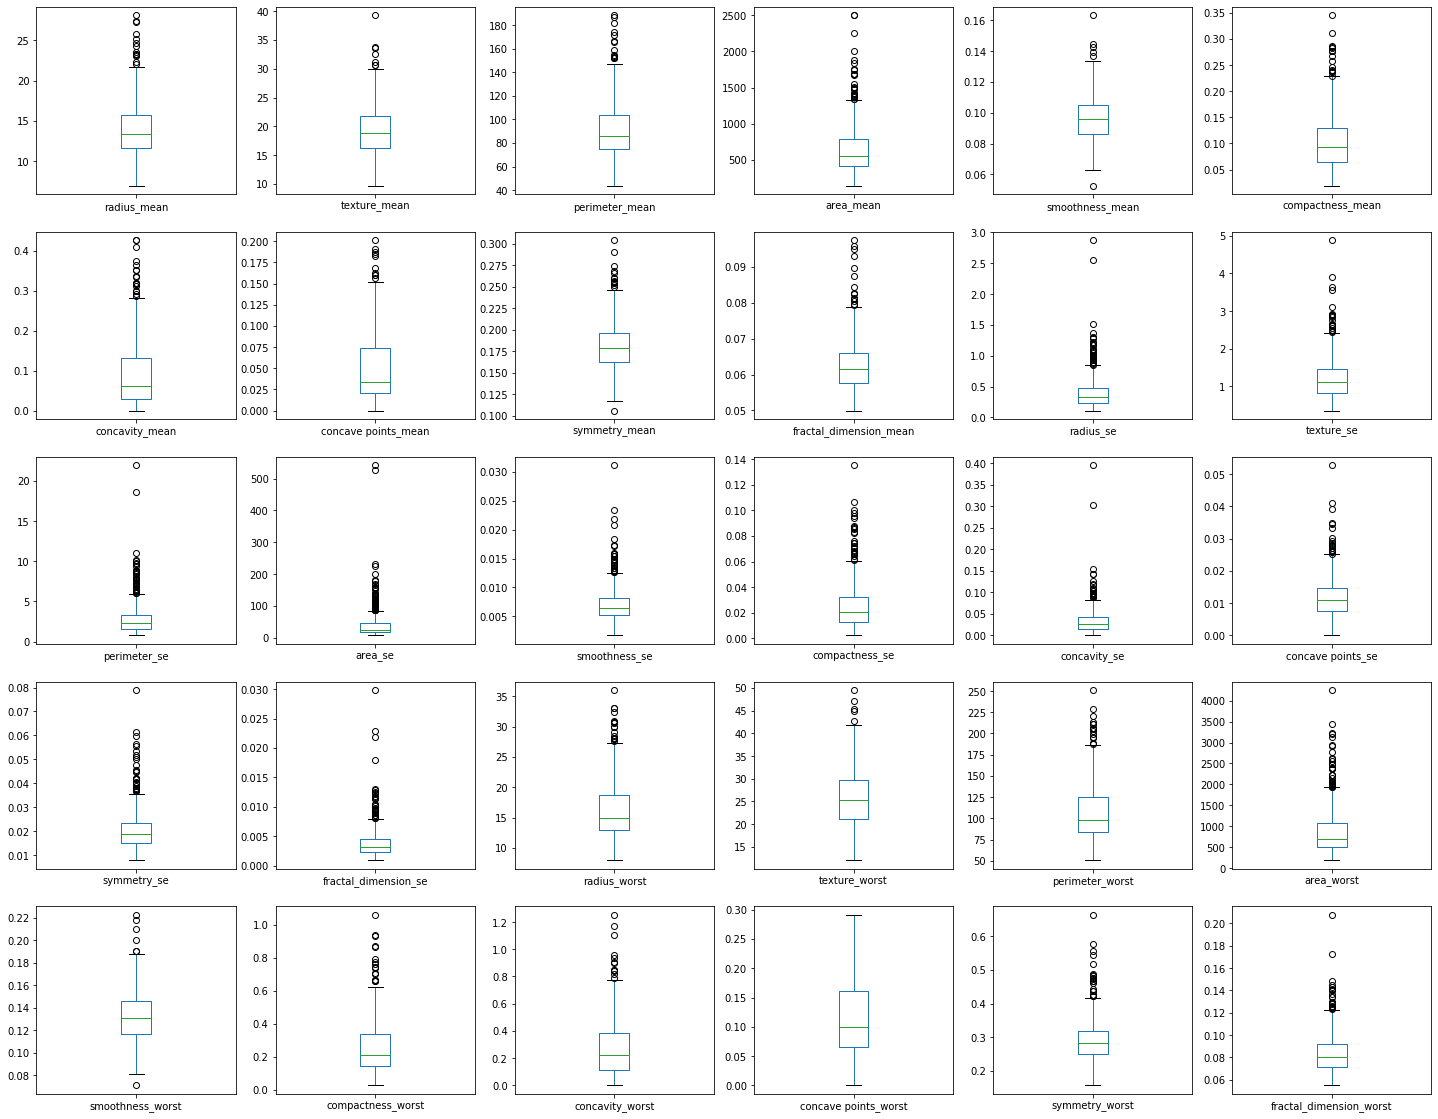

In [29]:
# box plot all features except id
df.iloc[:, 1:].plot(kind='box', subplots = True, layout = (5,6), figsize = (25,20))
plt.show()

In [30]:
# define IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [31]:
# define limit
lowlim = Q1 - 1.5*IQR
uplim = Q3 + 1.5*IQR

In [32]:
# filtering
df_iqr = df2[~((df2 < lowlim) | (df2 > uplim)).any(axis=1)]
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 6 to 566
Data columns (total 32 columns):
id                         346 non-null int64
diagnosis                  346 non-null int32
radius_mean                346 non-null float64
texture_mean               346 non-null float64
perimeter_mean             346 non-null float64
area_mean                  346 non-null float64
smoothness_mean            346 non-null float64
compactness_mean           346 non-null float64
concavity_mean             346 non-null float64
concave points_mean        346 non-null float64
symmetry_mean              346 non-null float64
fractal_dimension_mean     346 non-null float64
radius_se                  346 non-null float64
texture_se                 346 non-null float64
perimeter_se               346 non-null float64
area_se                    346 non-null float64
smoothness_se              346 non-null float64
compactness_se             346 non-null float64
concavity_se               346 non-

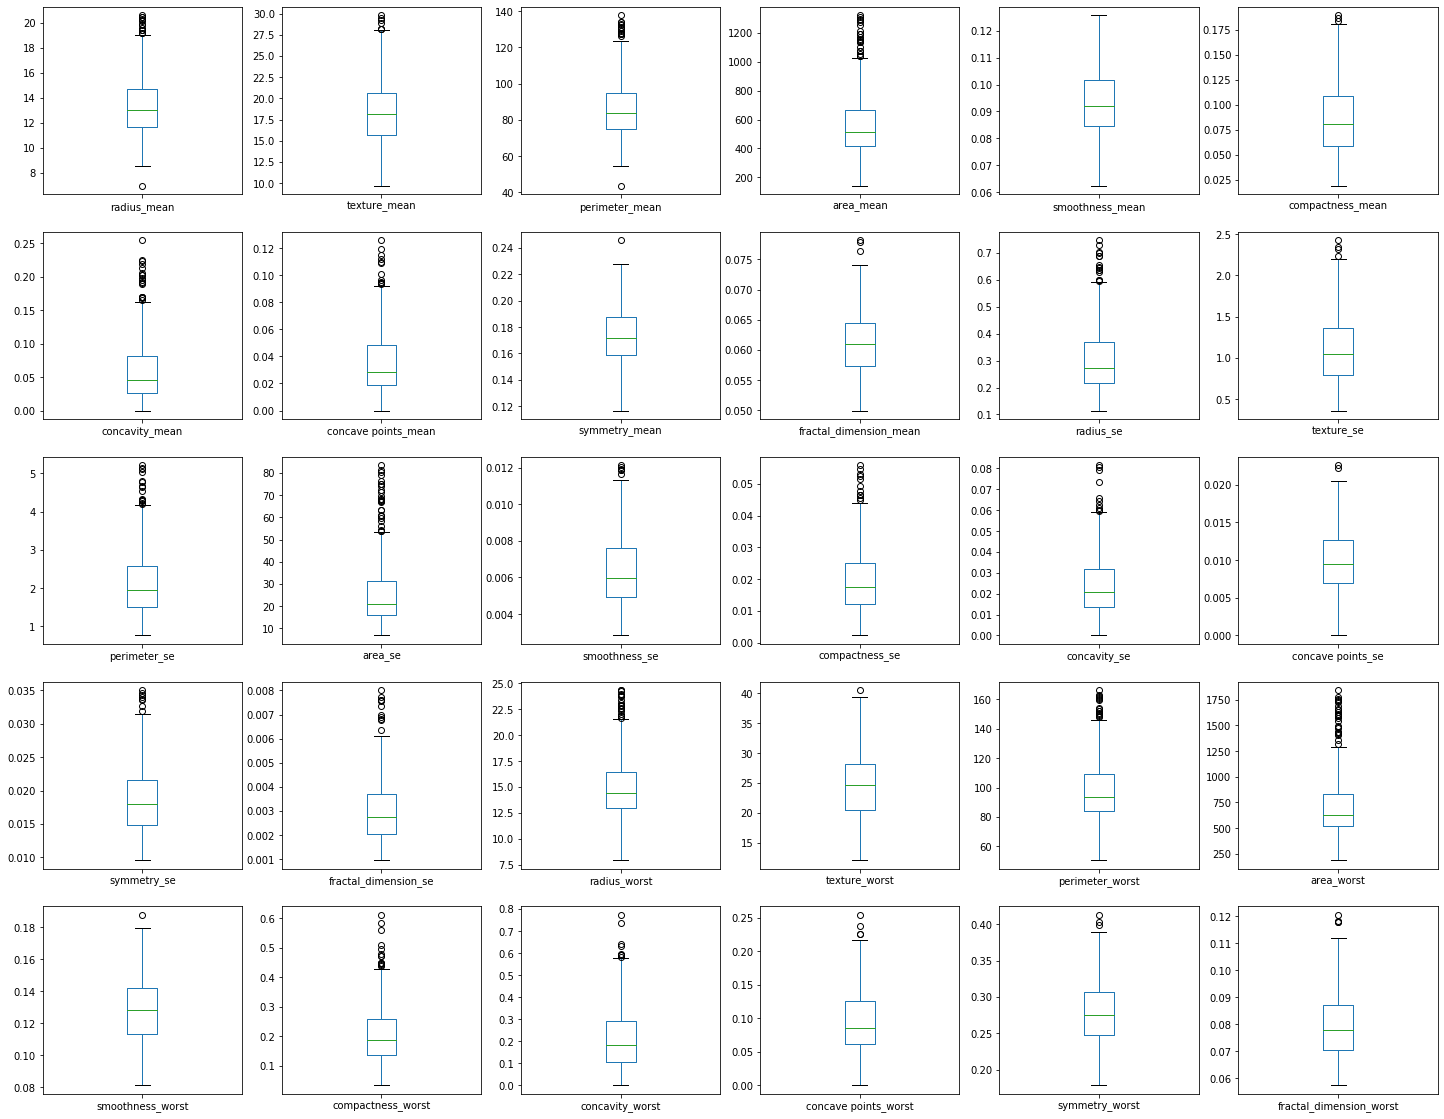

In [33]:
# box plot all filtered features
df_iqr.iloc[:, 2:].plot(kind='box', subplots = True, layout = (5,6), figsize = (25,20))
plt.show()

In [34]:
df_X3 = df_iqr.drop(['diagnosis'], axis=1)
df_y3 = df_iqr[['diagnosis']]

In [35]:
# splitting
X3_train, X3_test, y3_train, y3_test = train_test_split(df_X3, df_y3, test_size=0.3, random_state=33)

In [36]:
# scaling
scaler = MinMaxScaler()

scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)

scaler.fit(X3_test)
X3_test = scaler.transform(X3_test)

### Modelling (Various Algorithms)

In [256]:
# define modelling function

def modelling(X_train, y_train, X_test, y_test):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import f1_score
    
    # logistic regression
    model1 = LogisticRegression(random_state=33)
    model1.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    det1 = f1_score(y_test, pred1)
    
    # Random Forest Classifier
    model2 = RandomForestClassifier(random_state=33)
    model2.fit(X_train, y_train)
    pred2 = model2.predict(X_test)
    det2 = f1_score(y_test, pred2)
    
    # SVC
    model3 = svm.SVC(random_state=33)
    model3.fit(X_train, y_train)
    pred3 = model3.predict(X_test)
    det3 = f1_score(y_test, pred3)
    
    # K-Nearest Neighbor
    model4 = KNeighborsClassifier(n_neighbors=11)
    model4.fit(X_train, y_train) 
    pred4 = model4.predict(X_test)
    det4 = f1_score(y_test, pred4)
    
    # Xtreme Gradient Boost
    model5 = XGBClassifier(random_state=33, eval_metric='error')
    model5.fit(X_train, y_train)
    pred5 = model5.predict(X_test)
    det5 = f1_score(y_test, pred5)
    
    print(f'\n \n Model Score\n',
          f'Logistic Regression\t : \t {model1.score(X_train, y_train)}\n',
          f'Random Forest Classifier: \t {model2.score(X_train, y_train)}\n',
          f'SVC\t \t \t : \t {model3.score(X_train, y_train)}\n',
          f'K-Nearest Neighbor\t : \t {model4.score(X_train, y_train)}\n',
          f'Xtreme Gradient Boost\t : \t {model5.score(X_train, y_train)}')
    
    print(f'\n \n F1 Score\n',
          f'Logistic Regression\t : \t {det31}\n',
          f'Random Forest Classifier: \t {det32}\n',
          f'SVC\t \t \t : \t {det33}\n',
          f'K-Nearest Neighbor\t : \t {det34}\n',
          f'Xtreme Gradient Boost\t : \t {det35}\n \n')
    
    return det1, det2, det3, det4, det5

In [253]:
det31, det32, det33, det34, det35 = modelling(X3_train, y3_train, X3_test, y3_test)


 
 Model Score
 Logistic Regression	 : 	 0.9628099173553719
 Random Forest Classifier: 	 1.0
 SVC	 	 	 : 	 0.9297520661157025
 K-Nearest Neighbor	 : 	 0.9380165289256198
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.9803921568627451
 Random Forest Classifier: 	 0.9199999999999999
 SVC	 	 	 : 	 0.9600000000000001
 K-Nearest Neighbor	 : 	 0.9230769230769231
 Xtreme Gradient Boost	 : 	 0.9019607843137256
 



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the

# 3.4 Preprocessing & Modelling 4

### Preprocessing (Z-Score Outliers Detection)

In [417]:
df2f = df2.iloc[:,2:]
cols = list(df2.iloc[:,2:].columns)

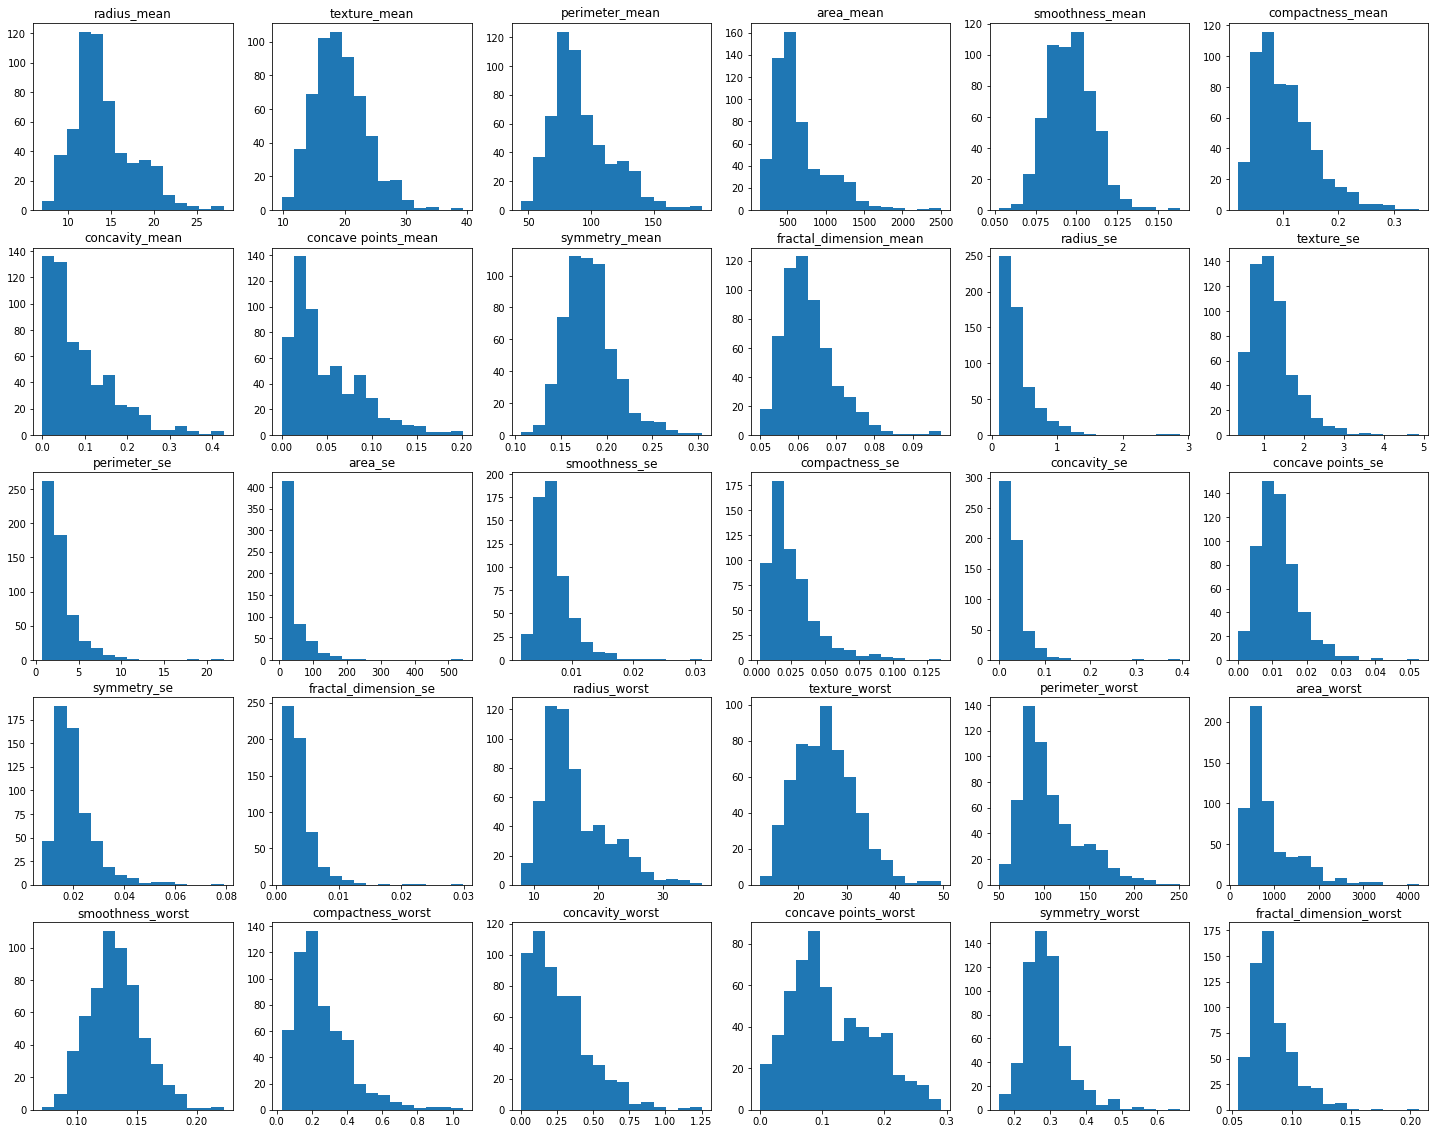

In [420]:
# plotting histogram

fig = plt.figure(figsize=(25,20))

for i in range(len(df2f.columns)):
    
    ax = fig.add_subplot(5,6,1+i)
    ax.hist(df2f.iloc[:,i], bins=15)
    ax.set_title(cols[i])
    
plt.show()

In [58]:
# define z-score
dfz = df2.copy().iloc[:,2:].add_prefix('z_')
dfz = (dfz - dfz.mean()) / dfz.std()
dfz['id'] = df2['id']
dfz.head()

,z_radius_mean,z_texture_mean,z_perimeter_mean,z_area_mean,z_smoothness_mean,z_compactness_mean,z_concavity_mean,z_concave points_mean,z_symmetry_mean,z_fractal_dimension_mean,...,z_texture_worst,z_perimeter_worst,z_area_worst,z_smoothness_worst,z_compactness_worst,z_concavity_worst,z_concave points_worst,z_symmetry_worst,z_fractal_dimension_worst,id
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,842302
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,842517
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,84300903
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,84348301
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,84358402


In [59]:
# merge dataframes
df2z = pd.merge(df2, dfz, on='id')
df2z.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,z_radius_worst,z_texture_worst,z_perimeter_worst,z_area_worst,z_smoothness_worst,z_compactness_worst,z_concavity_worst,z_concave points_worst,z_symmetry_worst,z_fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [60]:
# filtering
df_zf = df2z[~((df2z.iloc[:, 32:] > 3) | (df2z.iloc[:, 32:] < -3)).any(axis=1)]
df_zf = df_zf.iloc[:, 0:32]
df_zf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 566
Data columns (total 32 columns):
id                         495 non-null int64
diagnosis                  495 non-null int32
radius_mean                495 non-null float64
texture_mean               495 non-null float64
perimeter_mean             495 non-null float64
area_mean                  495 non-null float64
smoothness_mean            495 non-null float64
compactness_mean           495 non-null float64
concavity_mean             495 non-null float64
concave points_mean        495 non-null float64
symmetry_mean              495 non-null float64
fractal_dimension_mean     495 non-null float64
radius_se                  495 non-null float64
texture_se                 495 non-null float64
perimeter_se               495 non-null float64
area_se                    495 non-null float64
smoothness_se              495 non-null float64
compactness_se             495 non-null float64
concavity_se               495 non-

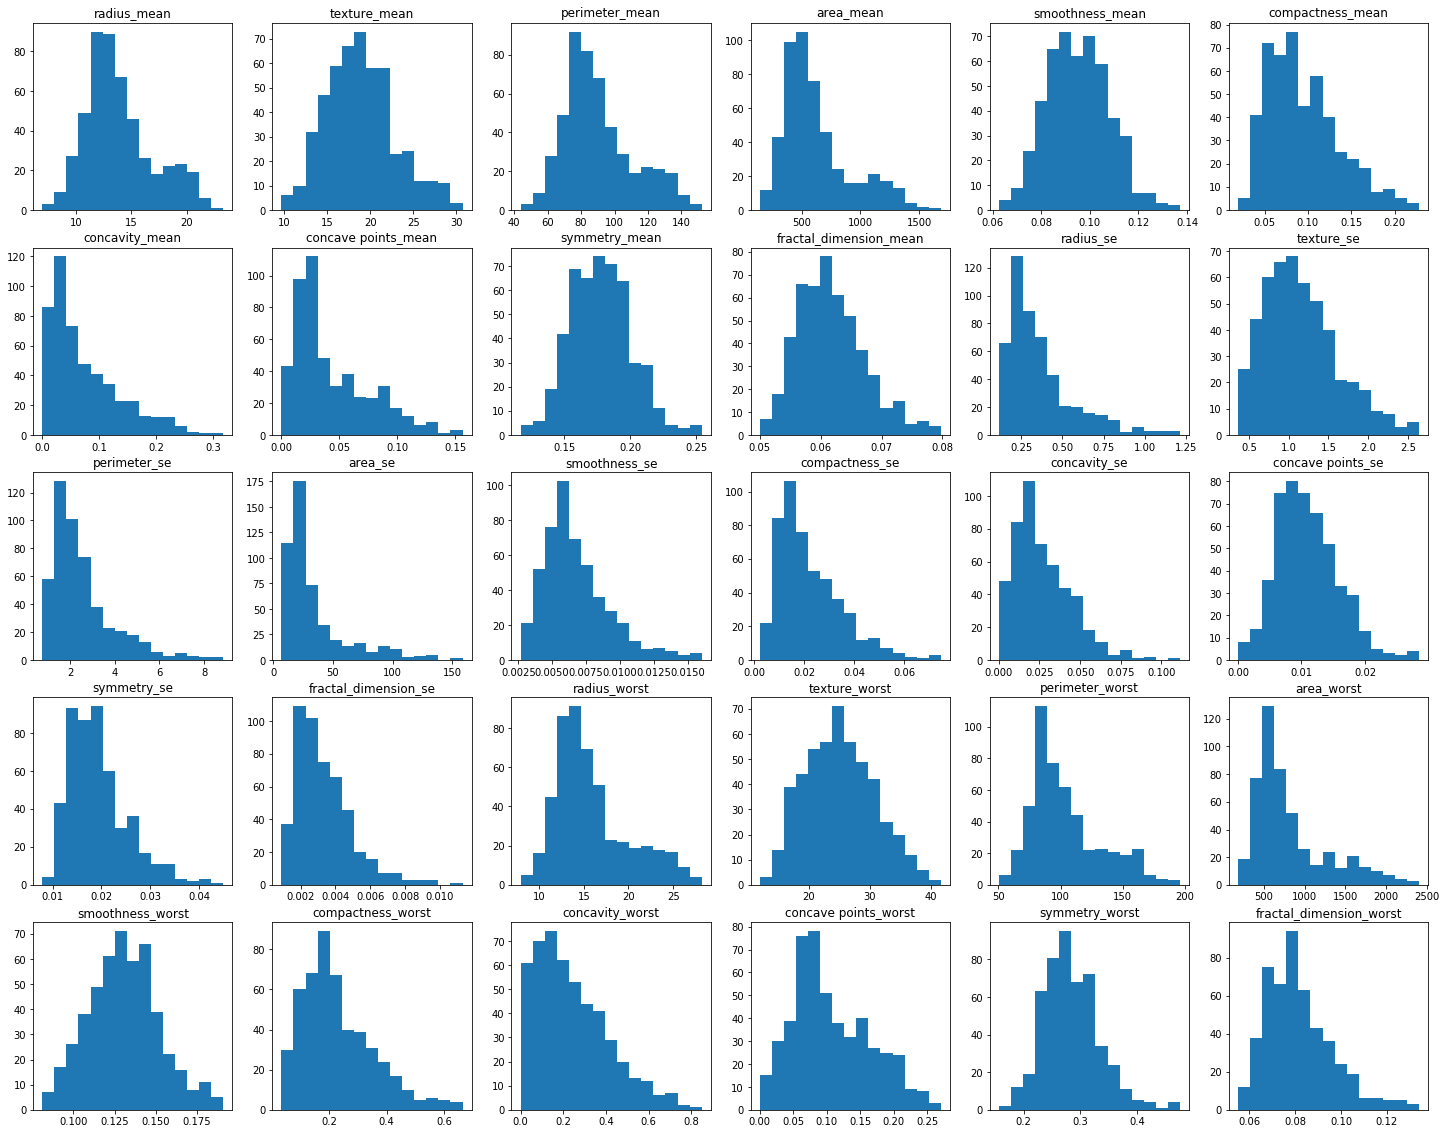

In [430]:
# plotting histogram after outliers removal

fig = plt.figure(figsize=(25,20))

for i in range(len(df_zf.iloc[:,2:].columns)):
    
    ax = fig.add_subplot(5,6,1+i)
    ax.hist(df_zf.iloc[:,2+i], bins=15)
    ax.set_title(cols[i])
    
plt.show()

In [62]:
df_X4 = df_zf.drop(['diagnosis'], axis=1)
df_y4 = df_zf[['diagnosis']]

In [63]:
# splitting
X4_train, X4_test, y4_train, y4_test = train_test_split(df_X4, df_y4, test_size=0.3, random_state=33)

In [64]:
# scaling
scaler = MinMaxScaler()

scaler.fit(X4_train)
X4_train = scaler.transform(X4_train)

scaler.fit(X4_test)
X4_test = scaler.transform(X4_test)

### Modelling (Various Algorithms)

In [254]:
det41, det42, det43, det44, det45 = modelling(X4_train, y4_train, X4_test, y4_test)


 
 Model Score
 Logistic Regression	 : 	 0.9653179190751445
 Random Forest Classifier: 	 0.9913294797687862
 SVC	 	 	 : 	 0.9421965317919075
 K-Nearest Neighbor	 : 	 0.9595375722543352
 Xtreme Gradient Boost	 : 	 1.0

 
 F1 Score
 Logistic Regression	 : 	 0.9803921568627451
 Random Forest Classifier: 	 0.9199999999999999
 SVC	 	 	 : 	 0.9600000000000001
 K-Nearest Neighbor	 : 	 0.9230769230769231
 Xtreme Gradient Boost	 : 	 0.9019607843137256
 



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the

# 4. Conclusion

In [255]:
f1_scores = {'Algorithm':['LogReg', 'RF', 'SVC', 'KNNeighbor', 'XGBoost'], 
             'F1 Score (IQR)':[det31, det32, det33, det34, det35], 
             'F1 Score (ZScore)':[det41, det42, det43, det44, det45]}

F1 = pd.DataFrame(f1_scores)

print('Sri Bagus N')
F1.round(2)

Sri Bagus N


,Algorithm,F1 Score (IQR),F1 Score (ZScore)
0,LogReg,0.98,0.96
1,RF,0.92,0.94
2,SVC,0.96,0.95
3,KNNeighbor,0.92,0.96
4,XGBoost,0.90,0.93
